In [1]:
#EXOGENOUS FACTOR CHECK

import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from datetime import datetime
from collections import Counter
import re

#importing packages for the time-series data
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

In [2]:
#importing data
df = pd.read_excel("./New_Arimax_data.xlsx")


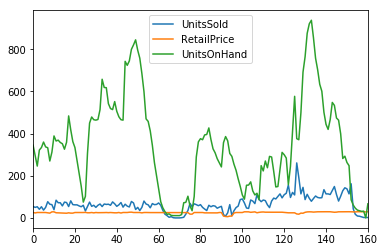

In [3]:
df[['UnitsSold','RetailPrice','UnitsOnHand']].plot()
plot.show()


In [4]:
import statsmodels.api as sm
print(sm.tsa.stattools.adfuller(df['UnitsSold']))
print(sm.tsa.stattools.adfuller(df['RetailPrice']))

(-3.1596055507901024, 0.022445200783522395, 1, 159, {'1%': -3.472161410886292, '5%': -2.8798954259680936, '10%': -2.5765565828092245}, 1353.6481074143949)
(-2.7861657864508524, 0.06027722114665091, 4, 156, {'1%': -3.4729792729247793, '5%': -2.8802520918255534, '10%': -2.5767469641683105}, 1639.8502837355488)


In [5]:
df['const']=1
df['S']=df['UnitsSold']
#Mention the Exogenous factor that is to be checked
df['E']=df['RetailPrice']
model2=sm.OLS(endog=df['S'].dropna(),exog=df[['RetailPrice','const']].dropna())
results2=model2.fit()
print(results2.summary())


                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.548
Date:                Wed, 11 Mar 2020   Prob (F-statistic):              0.112
Time:                        00:27:03   Log-Likelihood:                -817.60
No. Observations:                 161   AIC:                             1639.
Df Residuals:                     159   BIC:                             1645.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
RetailPrice     1.2732      0.798      1.596      